In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import json
import requests
from PIL import Image
from io import BytesIO
import tweepy
import wptools
import datetime

# Gathering Data

In [2]:
# Reading the twitter archive enhanced CSV file, and examining it
twitter_archive_enhanced= pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response= requests.get(url)
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

In [6]:
print("The list of tweets" ,len(tweet_id_success))
print("The list of tweets no found" , len(tweet_id_missing))

The list of tweets 2329
The list of tweets no found 27


In [7]:
# Write tweet data to json file
with open('tweet_json.txt', mode = 'w') as file:
    json.dump(tweet_data, file)

In [8]:
# Load the Twitter API data
tweet_json = pd.read_json('tweet_json.txt')
tweet_json['tweet_id'] = tweet_id_success
tweet_json = tweet_json[['tweet_id', 'favorite_count', 'retweet_count']]

# Assessing Data
1- twitter_archive_enhanced

In [9]:
twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [10]:
print(twitter_archive_enhanced['rating_numerator'].max())
print(twitter_archive_enhanced['rating_numerator'].min())

1776
0


In [11]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
twitter_archive_enhanced['tweet_id'].duplicated().sum()

0

In [13]:
twitter_archive_enhanced['rating_numerator'][twitter_archive_enhanced['rating_numerator']< 10]

45      5
229     6
315     0
387     7
462     7
       ..
2351    5
2352    6
2353    9
2354    7
2355    8
Name: rating_numerator, Length: 440, dtype: int64

In [14]:
# no. of ratings that is under 10
sum(twitter_archive_enhanced['rating_numerator']< 10)

440

In [15]:
twitter_archive_enhanced['rating_denominator'][twitter_archive_enhanced['rating_denominator']!= 10]

313       0
342      15
433      70
516       7
784      11
902     150
1068     11
1120    170
1165     20
1202     50
1228     90
1254     80
1274     50
1351     50
1433     40
1598     20
1634    130
1635    110
1662     11
1663     16
1779    120
1843     80
2335      2
Name: rating_denominator, dtype: int64

In [16]:
# no. of ratings that is not based to 10
sum(twitter_archive_enhanced['rating_denominator']!= 10)

23

In [17]:
twitter_archive_enhanced[['rating_numerator','rating_denominator']][twitter_archive_enhanced['rating_denominator']!= 10]

,rating_numerator,rating_denominator
313,960,0
342,11,15
433,84,70
516,24,7
784,9,11
902,165,150
1068,9,11
1120,204,170
1165,4,20
1202,50,50


In [18]:
twitter_archive_enhanced['text'].str.split(':').str[1]

0       //t.co/MgUWQ76dJU
1       //t.co/0Xxu71qeIV
2       //t.co/wUnZnhtVJB
3       //t.co/tD36da7qLQ
4       //t.co/AtUZn91f7f
              ...        
2351    //t.co/4B7cOc1EDq
2352    //t.co/DWnyCjf2mx
2353    //t.co/y671yMhoiR
2354    //t.co/r7mOb2m0UI
2355    //t.co/BLDqew2Ijj
Name: text, Length: 2356, dtype: object

In [19]:
# Adding an image url column
twitter_archive_enhanced['image_url']= 'http:' + twitter_archive_enhanced['text'].str.split(':').str[1]
twitter_archive_enhanced.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,image_url
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,http://t.co/MgUWQ76dJU
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,http://t.co/0Xxu71qeIV
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,http://t.co/wUnZnhtVJB


In [20]:
twitter_archive_enhanced.loc[1165,:]

tweet_id                                                     722974582966214656
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2016-04-21 02:25:47 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          Happy 4/20 from the squad! 13/10 for all https...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/722974582...
rating_numerator                                                              4
rating_denominator                                                           20
name                                    

In [21]:
twitter_archive_enhanced['name'].value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
           ... 
Tayzie        1
Karma         1
Freddery      1
Rhino         1
Spencer       1
Name: name, Length: 957, dtype: int64

--------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------
2- tweet_json 

In [22]:
tweet_json.head(2)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,35796,7568
1,892177421306343426,30904,5608


In [23]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2329 non-null   int64
 1   favorite_count  2329 non-null   int64
 2   retweet_count   2329 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [24]:
tweet_json['tweet_id'].duplicated().sum()

0

In [25]:
# Most retweeted 
tweet_json.loc[tweet_json['retweet_count']==tweet_json['retweet_count'].max()]

,tweet_id,favorite_count,retweet_count
1015,744234799360020481,154225,76485


In [26]:
# Most favorite count 
tweet_json.loc[tweet_json['favorite_count']==tweet_json['favorite_count'].max()]

,tweet_id,favorite_count,retweet_count
1015,744234799360020481,154225,76485


--------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------
3- image_prediction

In [27]:
image_prediction.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [28]:
image_prediction['jpg_url'].duplicated().sum()

66

In [29]:
image_prediction['tweet_id'].duplicated().sum()

0

In [30]:
image_prediction.duplicated().sum()

0

In [31]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
image_prediction['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
limousine               1
EntleBucher             1
military_uniform        1
beaver                  1
carton                  1
Name: p1, Length: 378, dtype: int64

In [33]:
image_prediction['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [34]:
image_prediction['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [35]:
image_prediction['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [36]:
image_prediction['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
paper_towel             1
iPod                    1
cowboy_hat              1
grey_fox                1
Gila_monster            1
Name: p2, Length: 405, dtype: int64

In [37]:
image_prediction['p3'].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
brown_bear             1
paintbrush             1
African_grey           1
moped                  1
valley                 1
Name: p3, Length: 408, dtype: int64

# Quality issues to be cleaned

twitter_archive_enhanced:
    
    1- retweeted_status_id has some non-null values, which indicate the presence of  
       retweets. 
    2- Drop columns related to any retweets info.
    3- Delete unnecessary columns.
    4- name column has some entries that are not names, ex: a, the, an,....; so we will replace them with Nan.
    5- Correct the values in rating_denominator&rating_denominator. 
    6- convert timestamp into datetime type.
    7-Converting ID column to object dtype.

tweet_json:

    1- It has 25 less entries than twitter_archive_enhanced.

image_prediction:

    1- tweet_id type to be changed to object.
    2- Dropping the 66 duplicated entries in the jpg_url column. 

# Tidiness issues to be handled:
   
   1-  Merge the columns (doggo, floofer, pupper, and puppo) into one column 'dog_stage'.
   
   2- Merging all data frames together.


# Cleaning process:


In [38]:
twitter_archive_enhanced_clean = twitter_archive_enhanced.copy()
tweet_json_clean = tweet_json.copy()
image_prediction_clean = image_prediction.copy()

1- Deleting retweets data

In [39]:
#CODE: Delete retweets by filtering the NaN of retweeted_status_user_id
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[pd.isnull(twitter_archive_enhanced_clean['retweeted_status_user_id'])]

#TEST
print(sum(twitter_archive_enhanced_clean.retweeted_status_user_id.value_counts()))

0


In [40]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

In [41]:
twitter_archive_enhanced_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'image_url'],
      dtype='object')

2,3- Dropping retweets related data. And deleting the columns that will not be used in our analysis 

In [42]:
# dropping retweets data, aliong with any unneccessary columns in our analysis
twitter_archive_enhanced_clean.drop(['source',
                                     'in_reply_to_status_id',
                                     'in_reply_to_user_id',
                                     'retweeted_status_id',
                                     'retweeted_status_user_id', 
                                     'retweeted_status_timestamp', 
                                     'expanded_urls',
                                     'retweeted_status_id'], 1, inplace=True)

In [43]:
twitter_archive_enhanced_clean=twitter_archive_enhanced_clean.reset_index()

In [44]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   index               2175 non-null   int64 
 1   tweet_id            2175 non-null   int64 
 2   timestamp           2175 non-null   object
 3   text                2175 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   doggo               2175 non-null   object
 8   floofer             2175 non-null   object
 9   pupper              2175 non-null   object
 10  puppo               2175 non-null   object
 11  image_url           2122 non-null   object
dtypes: int64(4), object(8)
memory usage: 204.0+ KB


# Tidiness issue no.1
Merging doggo, floofer, pupper, puppo columns into one column dog_stage

In [45]:
# Extract dog stages from 'text' column into new 'dog_stage' column 
twitter_archive_enhanced_clean['dog_stage'] = twitter_archive_enhanced_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')
twitter_archive_enhanced_clean.head(2)

,index,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,image_url,dog_stage
0,0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,http://t.co/MgUWQ76dJU,NaN
1,1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,http://t.co/0Xxu71qeIV,NaN


In [46]:
twitter_archive_enhanced_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)
twitter_archive_enhanced_clean

,index,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,image_url,dog_stage
0,0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,http://t.co/MgUWQ76dJU,NaN
1,1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,http://t.co/0Xxu71qeIV,NaN
2,2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,http://t.co/wUnZnhtVJB,NaN
3,3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,http://t.co/tD36da7qLQ,NaN
4,4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,http://t.co/AtUZn91f7f,NaN
...,...,...,...,...,...,...,...,...,...
2170,2351,666049248165822465,2015-11-16 00:24:50 +0000,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,http://t.co/4B7cOc1EDq,NaN
2171,2352,666044226329800704,2015-11-16 00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netf...,6,10,a,http://t.co/DWnyCjf2mx,NaN
2172,2353,666033412701032449,2015-11-15 23:21:54 +0000,Here is a very happy pup. Big fan of well-main...,9,10,a,http://t.co/y671yMhoiR,NaN
2173,2354,666029285002620928,2015-11-15 23:05:30 +0000,This is a western brown Mitsubishi terrier. Up...,7,10,a,http://t.co/r7mOb2m0UI,NaN


In [47]:
twitter_archive_enhanced_clean['dog_stage'].value_counts()

pupper     244
doggo       84
puppo       32
floofer      4
Name: dog_stage, dtype: int64

4- Cleaning the name column from any invalid dog names

In [48]:
# Find all names that start with a lowercase letter
lowercase_names = []
for row in twitter_archive_enhanced_clean['name']:
    if row[0].islower() and row not in lowercase_names:
        lowercase_names.append(row)
print(lowercase_names)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [49]:
# Find all names that start with a uppercase letter
uppercase_names = []
for row in twitter_archive_enhanced_clean['name']:
    if row[0].isupper() and len(row) <= 1:
        uppercase_names.append(row)
print(uppercase_names)

['O']


In [50]:
# Replace all names that start with a lowercase letter with a NaN
twitter_archive_enhanced_clean['name'].replace(lowercase_names, 
                        np.nan,
                       inplace = True)

# Replace all 'None's with a NaN
twitter_archive_enhanced_clean['name'].replace('None', 
                        np.nan,
                       inplace = True)

# Replace the name 'O' with "O'Malley" 
twitter_archive_enhanced_clean['name'].replace('O', 
                        "O'Malley",
                       inplace = True)

In [51]:
twitter_archive_enhanced_clean

,index,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,image_url,dog_stage
0,0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,http://t.co/MgUWQ76dJU,NaN
1,1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,http://t.co/0Xxu71qeIV,NaN
2,2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,http://t.co/wUnZnhtVJB,NaN
3,3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,http://t.co/tD36da7qLQ,NaN
4,4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,http://t.co/AtUZn91f7f,NaN
...,...,...,...,...,...,...,...,...,...
2170,2351,666049248165822465,2015-11-16 00:24:50 +0000,Here we have a 1949 1st generation vulpix. Enj...,5,10,NaN,http://t.co/4B7cOc1EDq,NaN
2171,2352,666044226329800704,2015-11-16 00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netf...,6,10,NaN,http://t.co/DWnyCjf2mx,NaN
2172,2353,666033412701032449,2015-11-15 23:21:54 +0000,Here is a very happy pup. Big fan of well-main...,9,10,NaN,http://t.co/y671yMhoiR,NaN
2173,2354,666029285002620928,2015-11-15 23:05:30 +0000,This is a western brown Mitsubishi terrier. Up...,7,10,NaN,http://t.co/r7mOb2m0UI,NaN


5- cleaning denominator ratings

In [52]:
invalid_denominators=list(twitter_archive_enhanced_clean['tweet_id'][twitter_archive_enhanced_clean['rating_denominator'] !=10])

In [53]:
twitter_archive_enhanced_clean[['tweet_id','image_url','rating_denominator','rating_numerator']][twitter_archive_enhanced_clean['rating_denominator']!= 10]

,tweet_id,image_url,rating_denominator,rating_numerator
263,835246439529840640,NaN,0,960
287,832088576586297345,NaN,15,11
363,820690176645140481,http://t.co/NIYC820tmd,70,84
429,810984652412424192,http:\nhttps,7,24
733,758467244762497024,http://t.co/HmwrdfEfUE,150,165
890,740373189193256964,http://t.co/XAVDNDaVgQ,11,9
942,731156023742988288,http://t.co/yGQI3He3xv,170,204
987,722974582966214656,http://t.co/eV1diwds8a,20,4
1024,716439118184652801,http://t.co/Kky1DPG4iq,50,50
1050,713900603437621249,http://t.co/mpvaVxKmc1,90,99


In [54]:
for i in invalid_denominators:
    x= image_prediction_clean[i == image_prediction_clean['tweet_id']][['tweet_id','jpg_url']]
    print(x)

Empty DataFrame
Columns: [tweet_id, jpg_url]
Index: []
Empty DataFrame
Columns: [tweet_id, jpg_url]
Index: []
                tweet_id                                          jpg_url
1728  820690176645140481  https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg
                tweet_id                                          jpg_url
1658  810984652412424192  https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg
                tweet_id                                            jpg_url
1338  758467244762497024  https://pbs.twimg.com/ext_tw_video_thumb/75846...
                tweet_id                                          jpg_url
1196  740373189193256964  https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg
                tweet_id                                          jpg_url
1148  731156023742988288  https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg
                tweet_id                                          jpg_url
1105  722974582966214656  https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jp

# Through a manual investigation of these invalid numerator and denominator ratings, I have conluded that:
1- some rows will be dropped due to the absence of a image to validate the rating; rows= 287,429,1419,1484

2- other rows will be corrected as per the photo data, as some photos contain multiple dogs, while others the rating was not correctly extracted.
where: 263 is 13/10, 890 is 14/10, 987 is 13/10, 1024 is 11/10, 1483 is 10/10, 2154 is 9/10,   

In [55]:
invalid_denominators

[835246439529840640,
 832088576586297345,
 820690176645140481,
 810984652412424192,
 758467244762497024,
 740373189193256964,
 731156023742988288,
 722974582966214656,
 716439118184652801,
 713900603437621249,
 710658690886586372,
 709198395643068416,
 704054845121142784,
 697463031882764288,
 686035780142297088,
 684225744407494656,
 684222868335505415,
 682962037429899265,
 682808988178739200,
 677716515794329600,
 675853064436391936,
 666287406224695296]

In [56]:
pd.set_option('display.max_colwidth', -1)

C:\Users\Amr\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [57]:
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.tweet_id==835246439529840640]

,index,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,image_url,dog_stage
263,313,835246439529840640,2017-02-24 21:54:03 +0000,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0,NaN,NaN,NaN


In [58]:
twitter_archive_enhanced_clean.iloc[1484]

index                 1663                                                                                                                                       
tweet_id              682808988178739200                                                                                                                         
timestamp             2016-01-01 06:22:03 +0000                                                                                                                  
text                  I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible
rating_numerator      20                                                                                                                                         
rating_denominator    16                                                                                                                                         
name                  NaN   

In [59]:
twitter_archive_enhanced_clean['rating']=twitter_archive_enhanced_clean['rating_numerator']/twitter_archive_enhanced_clean['rating_numerator']
twitter_archive_enhanced_clean['rating'].value_counts()

1.0    2173
Name: rating, dtype: int64

In [60]:
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['rating']==0]

,index,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,image_url,dog_stage,rating


In [61]:
#Updating both numerators and denominators 
twitter_archive_enhanced_clean.loc[(twitter_archive_enhanced_clean.tweet_id == 835246439529840640), 'rating_numerator'] = 13
twitter_archive_enhanced_clean.loc[(twitter_archive_enhanced_clean.tweet_id == 835246439529840640), 'rating_denominator'] = 10

twitter_archive_enhanced_clean.loc[(twitter_archive_enhanced_clean.tweet_id == 740373189193256964), 'rating_numerator'] = 14
twitter_archive_enhanced_clean.loc[(twitter_archive_enhanced_clean.tweet_id == 740373189193256964), 'rating_denominator'] = 10

twitter_archive_enhanced_clean.loc[(twitter_archive_enhanced_clean.tweet_id == 722974582966214656), 'rating_numerator'] = 13
twitter_archive_enhanced_clean.loc[(twitter_archive_enhanced_clean.tweet_id == 722974582966214656), 'rating_denominator'] = 10

twitter_archive_enhanced_clean.loc[(twitter_archive_enhanced_clean.tweet_id == 716439118184652801), 'rating_numerator'] = 11
twitter_archive_enhanced_clean.loc[(twitter_archive_enhanced_clean.tweet_id == 716439118184652801), 'rating_denominator'] = 10

twitter_archive_enhanced_clean.loc[(twitter_archive_enhanced_clean.tweet_id == 682962037429899265), 'rating_numerator'] = 10
twitter_archive_enhanced_clean.loc[(twitter_archive_enhanced_clean.tweet_id == 682962037429899265), 'rating_denominator'] = 10

twitter_archive_enhanced_clean.loc[(twitter_archive_enhanced_clean.tweet_id == 666287406224695296), 'rating_numerator'] = 9
twitter_archive_enhanced_clean.loc[(twitter_archive_enhanced_clean.tweet_id == 666287406224695296), 'rating_denominator'] = 10

twitter_archive_enhanced_clean.loc[(twitter_archive_enhanced_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26
twitter_archive_enhanced_clean.loc[(twitter_archive_enhanced_clean.tweet_id == 680494726643068929), 'rating_denominator'] = 10

twitter_archive_enhanced_clean.loc[(twitter_archive_enhanced_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twitter_archive_enhanced_clean.loc[(twitter_archive_enhanced_clean.tweet_id == 778027034220126208), 'rating_denominator'] = 10

twitter_archive_enhanced_clean.loc[(twitter_archive_enhanced_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twitter_archive_enhanced_clean.loc[(twitter_archive_enhanced_clean.tweet_id == 786709082849828864), 'rating_denominator'] = 10

#CODE: Delete five tweets with no actual ratings
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['tweet_id'] != 832088576586297345]
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['tweet_id'] != 810984652412424192]
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['tweet_id'] != 682808988178739200]
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['tweet_id'] != 686035780142297088]
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['tweet_id'] != 746906459439529985]
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['tweet_id'] != 835152434251116546]
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['tweet_id'] != 670842764863651840]
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['tweet_id'] != 670783437142401025]
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['tweet_id'] != 667549055577362432]
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['tweet_id'] != 666104133288665088]

6- Converting time column to datetime type

In [62]:
# Remove the time zone information from 'timestamp' column
twitter_archive_enhanced_clean['timestamp'] = twitter_archive_enhanced_clean['timestamp'].str.slice(start=0, stop=-6)



# Change the 'timestamp' column to a datetime object
twitter_archive_enhanced_clean['timestamp'] = pd.to_datetime(twitter_archive_enhanced_clean['timestamp'], format = "%Y-%m-%d %H:%M:%S")

7- Converting ID column to object dtype.

In [63]:
twitter_archive_enhanced_clean['tweet_id']=twitter_archive_enhanced_clean['tweet_id'].astype(str)

# cleaning tweet_json_clean

8- Converting ID column to object dtype.

In [64]:
tweet_json_clean

,tweet_id,favorite_count,retweet_count
0,892420643555336193,35796,7568
1,892177421306343426,30904,5608
2,891815181378084864,23250,3715
3,891689557279858688,39075,7754
4,891327558926688256,37321,8347
...,...,...,...
2324,666051853826850816,1113,763
2325,666050758794694657,124,51
2326,666049248165822465,96,40
2327,666044226329800704,266,130


In [65]:
tweet_json_clean['tweet_id']= tweet_json_clean['tweet_id'].astype(str)

# cleaning image_prediction_clean

In [66]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


9- Converting ID column to object dtype.

In [67]:
image_prediction_clean['tweet_id']= image_prediction_clean['tweet_id'].astype(str)

10- Deleting the 66 duplicated jpg_url entries

In [68]:
#Delete duplicated jpg_url
image_prediction_clean = image_prediction_clean.drop_duplicates(subset=['jpg_url'], keep='first')

In [69]:
sum(image_prediction_clean['jpg_url'].duplicated())

0

In [70]:
image_prediction_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


# Tidiness issue no.2:  Merging dataframes




In [72]:
from functools import reduce
dfs = [twitter_archive_enhanced_clean, tweet_json_clean, image_prediction_clean]
master_df = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), dfs)

In [73]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1978 entries, 0 to 1977
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               1978 non-null   int64         
 1   tweet_id            1978 non-null   object        
 2   timestamp           1978 non-null   datetime64[ns]
 3   text                1978 non-null   object        
 4   rating_numerator    1978 non-null   float64       
 5   rating_denominator  1978 non-null   int64         
 6   name                1342 non-null   object        
 7   image_url           1978 non-null   object        
 8   dog_stage           324 non-null    object        
 9   rating              1978 non-null   float64       
 10  favorite_count      1978 non-null   int64         
 11  retweet_count       1978 non-null   int64         
 12  jpg_url             1978 non-null   object        
 13  img_num             1978 non-null   int64       

# Deleting unneccessary columns from the dataframe

In [74]:
master_df.drop(['index', 'img_num'], axis=1, inplace=True)

In [75]:
master_df['rating']= master_df['rating_numerator']/master_df['rating_denominator']

In [76]:
master_df.head(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,image_url,dog_stage,rating,favorite_count,...,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10,Phineas,http://t.co/MgUWQ76dJU,NaN,1.3,35796,...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10,Tilly,http://t.co/0Xxu71qeIV,NaN,1.3,30904,...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


# Storing Data

In [77]:
master_df.to_csv('twitter_archive_master.csv')

# Analyzing and Visualizing Data

In [78]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [79]:
master_df.head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,image_url,dog_stage,rating,favorite_count,retweet_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10,Phineas,http://t.co/MgUWQ76dJU,NaN,1.3,35796,7568,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


# First insight

one tweet has both the most retweet_count&favorite_count

In [80]:
master_df[master_df['favorite_count']==master_df['favorite_count'].max()]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,image_url,dog_stage,rating,favorite_count,retweet_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
766,744234799360020481,2016-06-18 18:26:18,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,13.0,10,NaN,http://t.co/7wE9LTEXC4,doggo,1.3,154225,76485,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True


In [81]:
master_df[master_df['retweet_count']==master_df['retweet_count'].max()]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,image_url,dog_stage,rating,favorite_count,retweet_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
766,744234799360020481,2016-06-18 18:26:18,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,13.0,10,NaN,http://t.co/7wE9LTEXC4,doggo,1.3,154225,76485,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True


# Second insight
The most common dog breed in the dataset is the Golden Retriever

In [82]:
master_df['p1'].value_counts()

golden_retriever                  138
Labrador_retriever                93 
Pembroke                          88 
Chihuahua                         79 
pug                               54 
chow                              41 
Samoyed                           39 
Pomeranian                        38 
toy_poodle                        37 
malamute                          29 
cocker_spaniel                    27 
French_bulldog                    25 
Chesapeake_Bay_retriever          23 
miniature_pinscher                22 
seat_belt                         21 
Siberian_husky                    20 
German_shepherd                   19 
Maltese_dog                       18 
Eskimo_dog                        18 
teddy                             18 
Shetland_sheepdog                 18 
Staffordshire_bullterrier         18 
Cardigan                          17 
Shih-Tzu                          17 
beagle                            17 
Rottweiler                        17 
kuvasz      

# Third insight
the second most common deg breed is the Labrador Retriever

In [83]:
master_df['p2'].value_counts()

Labrador_retriever                96
golden_retriever                  81
Cardigan                          72
Chihuahua                         43
Chesapeake_Bay_retriever          40
French_bulldog                    39
Pomeranian                        39
toy_poodle                        36
Siberian_husky                    33
miniature_poodle                  32
cocker_spaniel                    32
beagle                            28
Eskimo_dog                        27
collie                            26
Pembroke                          25
kuvasz                            24
Italian_greyhound                 22
Pekinese                          21
chow                              20
miniature_pinscher                19
toy_terrier                       19
Norwegian_elkhound                19
malinois                          19
Samoyed                           19
Boston_bull                       18
American_Staffordshire_terrier    18
Staffordshire_bullterrier         17
p

In [84]:
master_df['p3'].value_counts()

Labrador_retriever                75
Chihuahua                         57
golden_retriever                  46
Eskimo_dog                        36
kelpie                            33
kuvasz                            31
chow                              31
toy_poodle                        29
beagle                            29
Staffordshire_bullterrier         29
cocker_spaniel                    28
Pekinese                          28
Great_Pyrenees                    26
Pembroke                          26
Pomeranian                        26
malamute                          25
French_bulldog                    25
Cardigan                          23
American_Staffordshire_terrier    23
Chesapeake_Bay_retriever          22
pug                               21
basenji                           20
bull_mastiff                      19
Siberian_husky                    19
toy_terrier                       18
Boston_bull                       17
Shetland_sheepdog                 17
L

# Visualizing the relation between the ratings and retweet counts 

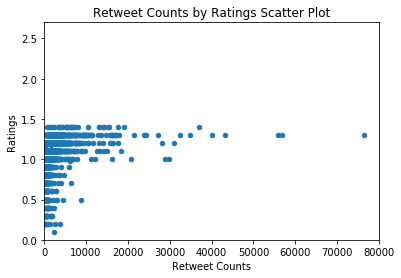

In [85]:
master_df.plot(x='retweet_count', y='rating', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Retweet Counts by Ratings Scatter Plot')
plt.axis([0,80000,0,2.7])
plt.show()

# Fourth insight 

The dog breed with the highest confidence is Golden Retriever. However, it is worth noting that although Labrador Retriever was the second most common dog breed in the dataset, it doesn't possess the second highest confidence, in fact it came in the 6th place. 

In [111]:
master_df['p1'][master_df['p1_conf']>=0.9].value_counts()

golden_retriever                  36
Pembroke                          26
pug                               24
Samoyed                           20
Pomeranian                        16
Labrador_retriever                15
Chihuahua                         13
French_bulldog                    12
web_site                          10
chow                              9 
Blenheim_spaniel                  6 
tennis_ball                       6 
toy_poodle                        5 
American_Staffordshire_terrier    4 
Shetland_sheepdog                 4 
vizsla                            4 
Bernese_mountain_dog              4 
Brittany_spaniel                  4 
German_shepherd                   4 
Shih-Tzu                          4 
Pekinese                          3 
Old_English_sheepdog              3 
Boston_bull                       3 
swing                             3 
basset                            3 
beagle                            3 
malamute                          3 
k